In [16]:
%matplotlib inline
from IPython.display import HTML
from __future__ import division
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
import numpy as np
import scipy
from scipy import stats
from scipy import integrate
import pandas
import peakfinder as pf
import cf
from cf import *
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

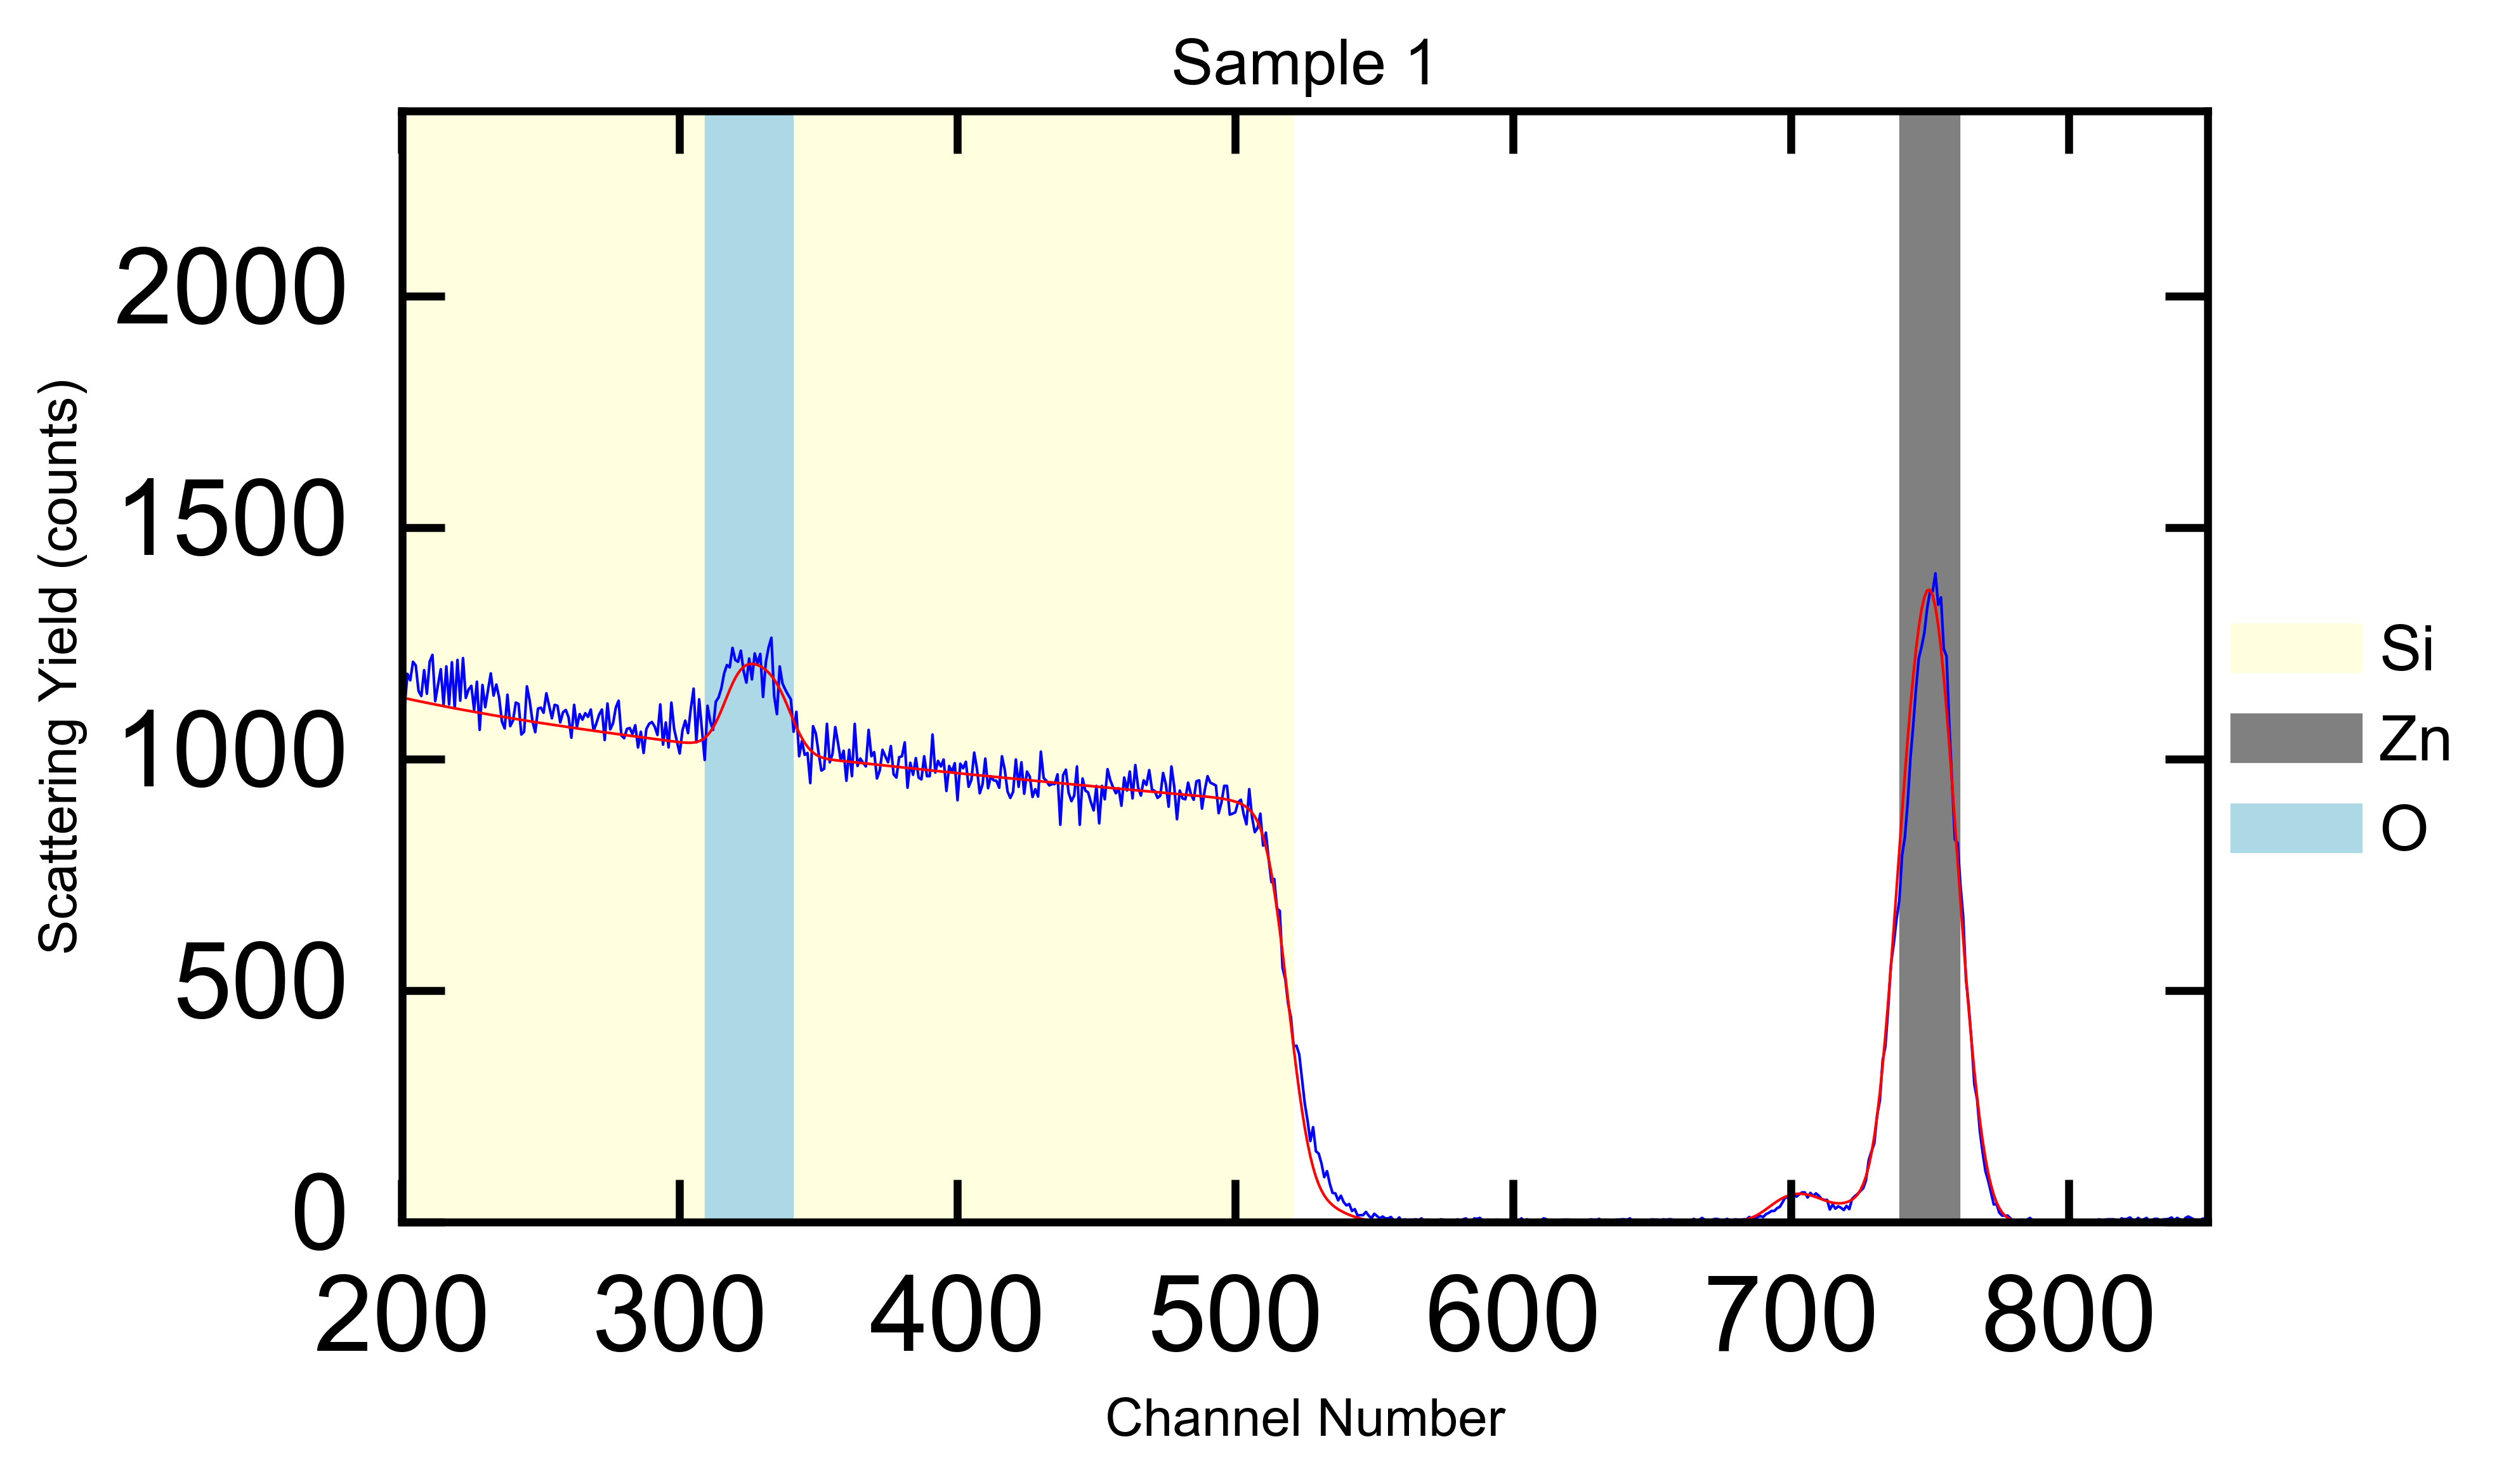

In [48]:
hw8dat = pandas.read_excel("RBS data-Sample1.xls", skiprows=1)

x = np.array(hw8dat.as_matrix(columns=hw8dat.columns[0:1])).squeeze()[:1024]
expdat = np.array(hw8dat.as_matrix(columns=hw8dat.columns[1:2])).squeeze()[:1024]
simdat = np.array(hw8dat.as_matrix(columns=hw8dat.columns[2:3])).squeeze()[:1024]
plt.plot(x, expdat, markerfacecolor='none', marker='', color='b', linewidth=0.5,  fillstyle="none", markeredgewidth = 0.5, markersize = 5)
plt.plot(x, simdat, markerfacecolor='none', marker='', color='r', linewidth=0.5,  fillstyle="none", markeredgewidth = 0.5, markersize = 5)
plt.axvspan(200,520, color = 'lightyellow', label="Si")
plt.axvspan(740,760, color = 'grey', label="Zn")
plt.axvspan(310,340, color = 'lightblue', label="O")
plt.legend(loc=(1,0.3))
plt.xlim(200,850)
plt.ylim(0,2400)
plt.xlabel("Channel Number")
plt.ylabel("Scattering Yield (counts)")
plt.title("Sample 1")

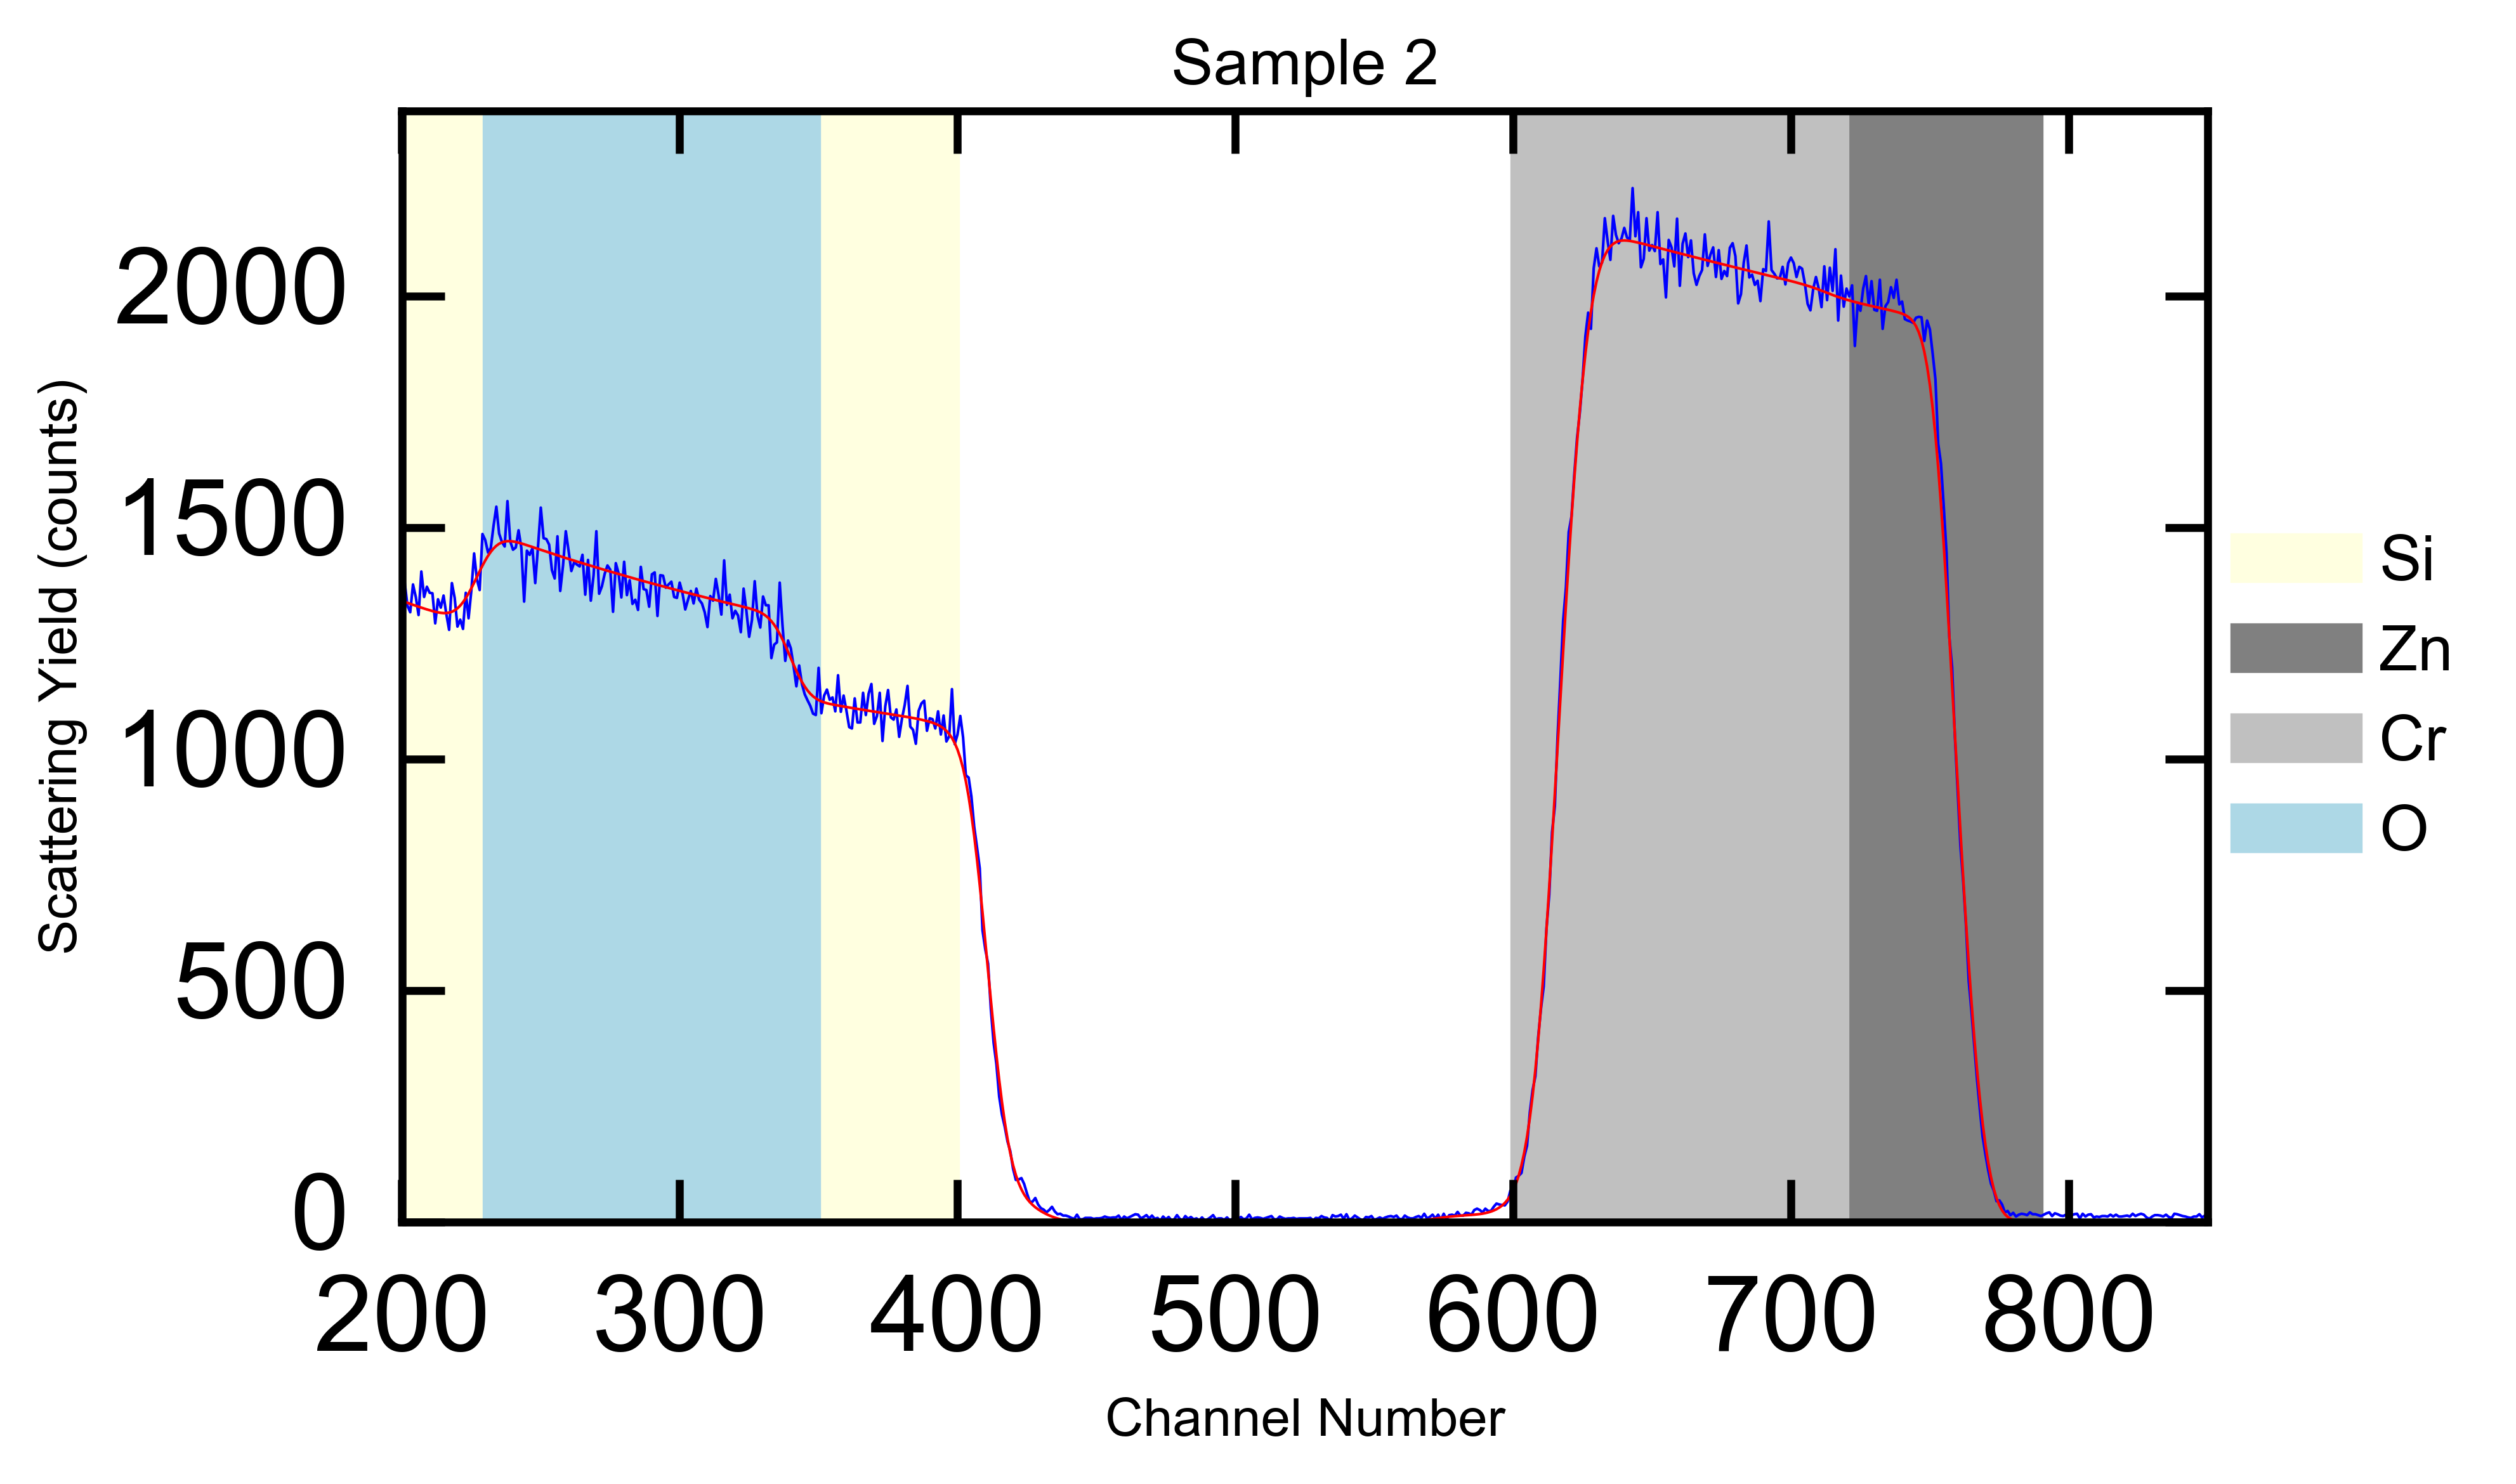

In [54]:
hw8dat = pandas.read_excel("RBS data-Sample2.xls", skiprows=1)

x = np.array(hw8dat.as_matrix(columns=hw8dat.columns[0:1])).squeeze()[:1024]
expdat = np.array(hw8dat.as_matrix(columns=hw8dat.columns[1:2])).squeeze()[:1024]
simdat = np.array(hw8dat.as_matrix(columns=hw8dat.columns[2:3])).squeeze()[:1024]
plt.plot(x, expdat, markerfacecolor='none', marker='', color='b', linewidth=0.5,  fillstyle="none", markeredgewidth = 0.5, markersize = 5)
plt.plot(x, simdat, markerfacecolor='none', marker='', color='r', linewidth=0.5,  fillstyle="none", markeredgewidth = 0.5, markersize = 5)
plt.axvspan(200,400, color = 'lightyellow', label="Si")
plt.axvspan(720,790, color = 'grey', label="Zn")
plt.axvspan(600,720, color = 'silver', label="Cr")
plt.axvspan(230,350, color = 'lightblue', label="O")
plt.legend(loc=(1,0.3))
plt.xlim(200,850)
plt.ylim(0,2400)
plt.xlabel("Channel Number")
plt.ylabel("Scattering Yield (counts)")
plt.title("Sample 2")

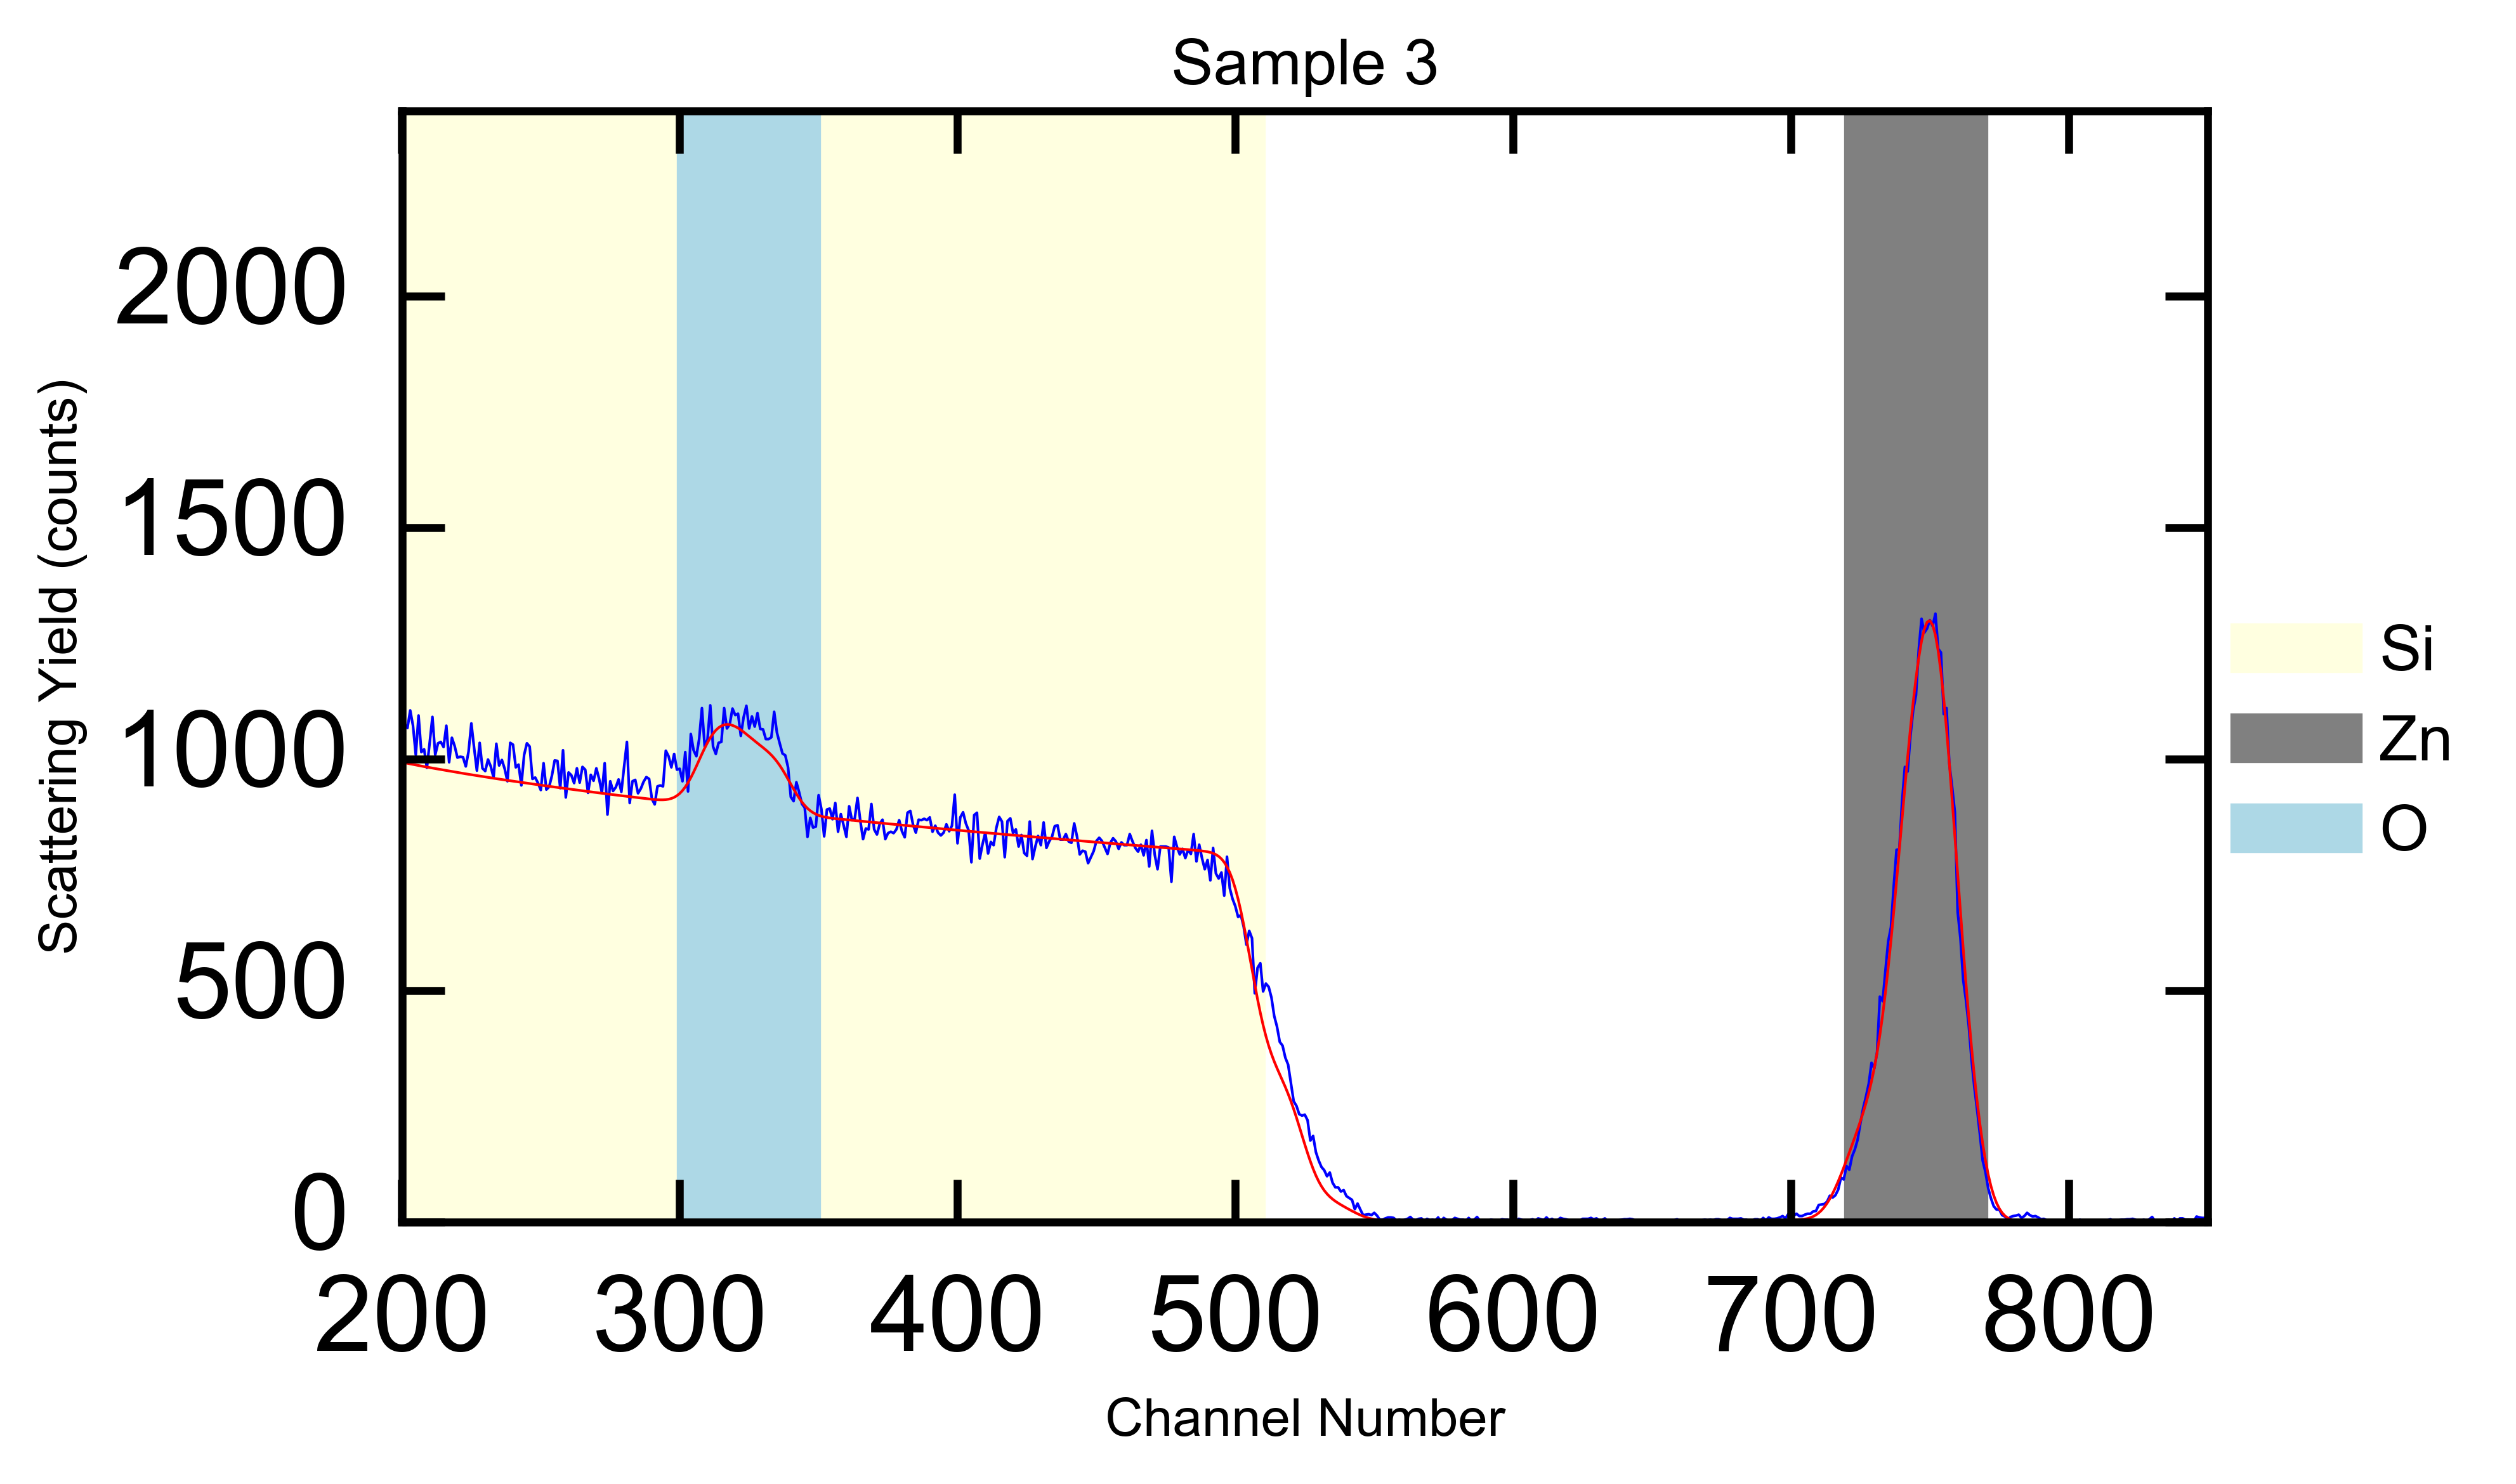

In [62]:
hw8dat = pandas.read_excel("RBS data-Sample3.xls", skiprows=1)

x = np.array(hw8dat.as_matrix(columns=hw8dat.columns[0:1])).squeeze()[:1024]
expdat = np.array(hw8dat.as_matrix(columns=hw8dat.columns[1:2])).squeeze()[:1024]
simdat = np.array(hw8dat.as_matrix(columns=hw8dat.columns[2:3])).squeeze()[:1024]
plt.plot(x, expdat, markerfacecolor='none', marker='', color='b', linewidth=0.5,  fillstyle="none", markeredgewidth = 0.5, markersize = 5)
plt.plot(x, simdat, markerfacecolor='none', marker='', color='r', linewidth=0.5,  fillstyle="none", markeredgewidth = 0.5, markersize = 5)
plt.axvspan(200,510, color = 'lightyellow', label="Si")
plt.axvspan(720,770, color = 'grey', label="Zn")
plt.axvspan(300,350, color = 'lightblue', label="O")
plt.legend(loc=(1,0.3))
plt.xlim(200,850)
plt.ylim(0,2400)
plt.xlabel("Channel Number")
plt.ylabel("Scattering Yield (counts)")
plt.title("Sample 3")

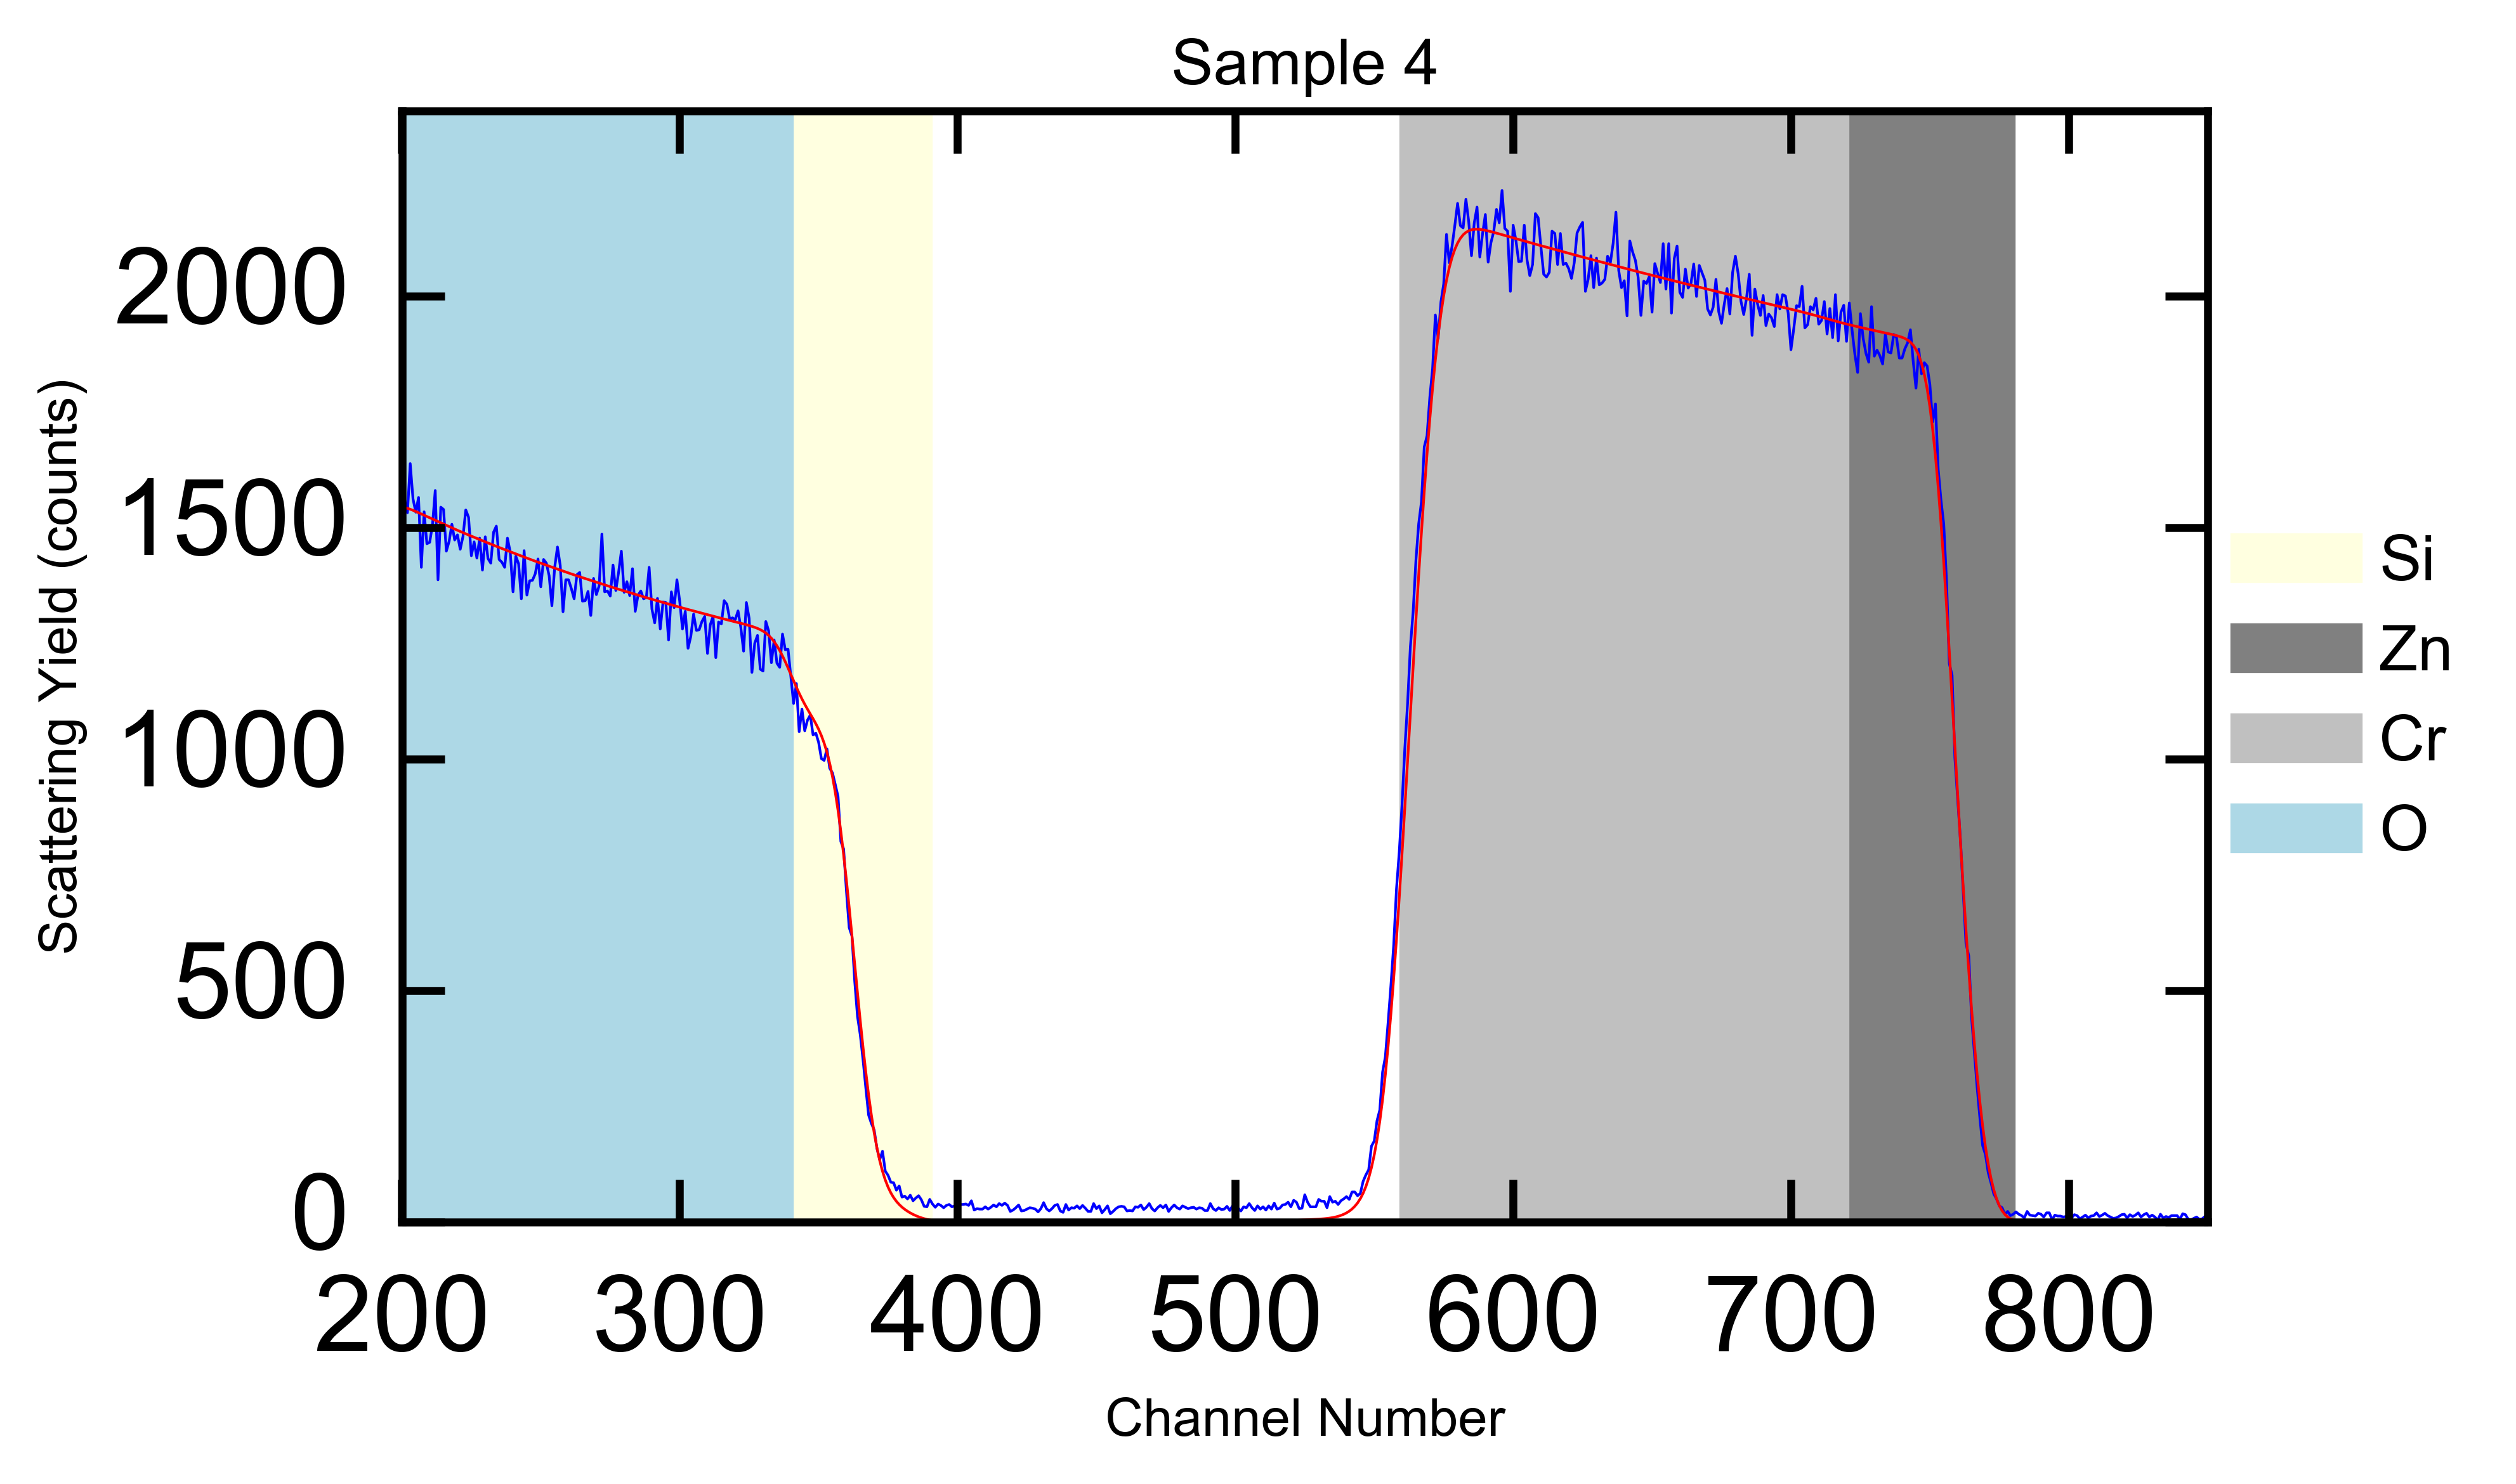

In [66]:
hw8dat = pandas.read_excel("RBS data-Sample4.xls", skiprows=1)

x = np.array(hw8dat.as_matrix(columns=hw8dat.columns[0:1])).squeeze()[:1024]
expdat = np.array(hw8dat.as_matrix(columns=hw8dat.columns[1:2])).squeeze()[:1024]
simdat = np.array(hw8dat.as_matrix(columns=hw8dat.columns[2:3])).squeeze()[:1024]
plt.plot(x, expdat, markerfacecolor='none', marker='', color='b', linewidth=0.5,  fillstyle="none", markeredgewidth = 0.5, markersize = 5)
plt.plot(x, simdat, markerfacecolor='none', marker='', color='r', linewidth=0.5,  fillstyle="none", markeredgewidth = 0.5, markersize = 5)
plt.axvspan(340,390, color = 'lightyellow', label="Si")
plt.axvspan(720,780, color = 'grey', label="Zn")
plt.axvspan(560,720, color = 'silver', label="Cr")
plt.axvspan(200,340, color = 'lightblue', label="O")
plt.legend(loc=(1,0.3))
plt.xlim(200,850)
plt.ylim(0,2400)
plt.xlabel("Channel Number")
plt.ylabel("Scattering Yield (counts)")
plt.title("Sample 4")

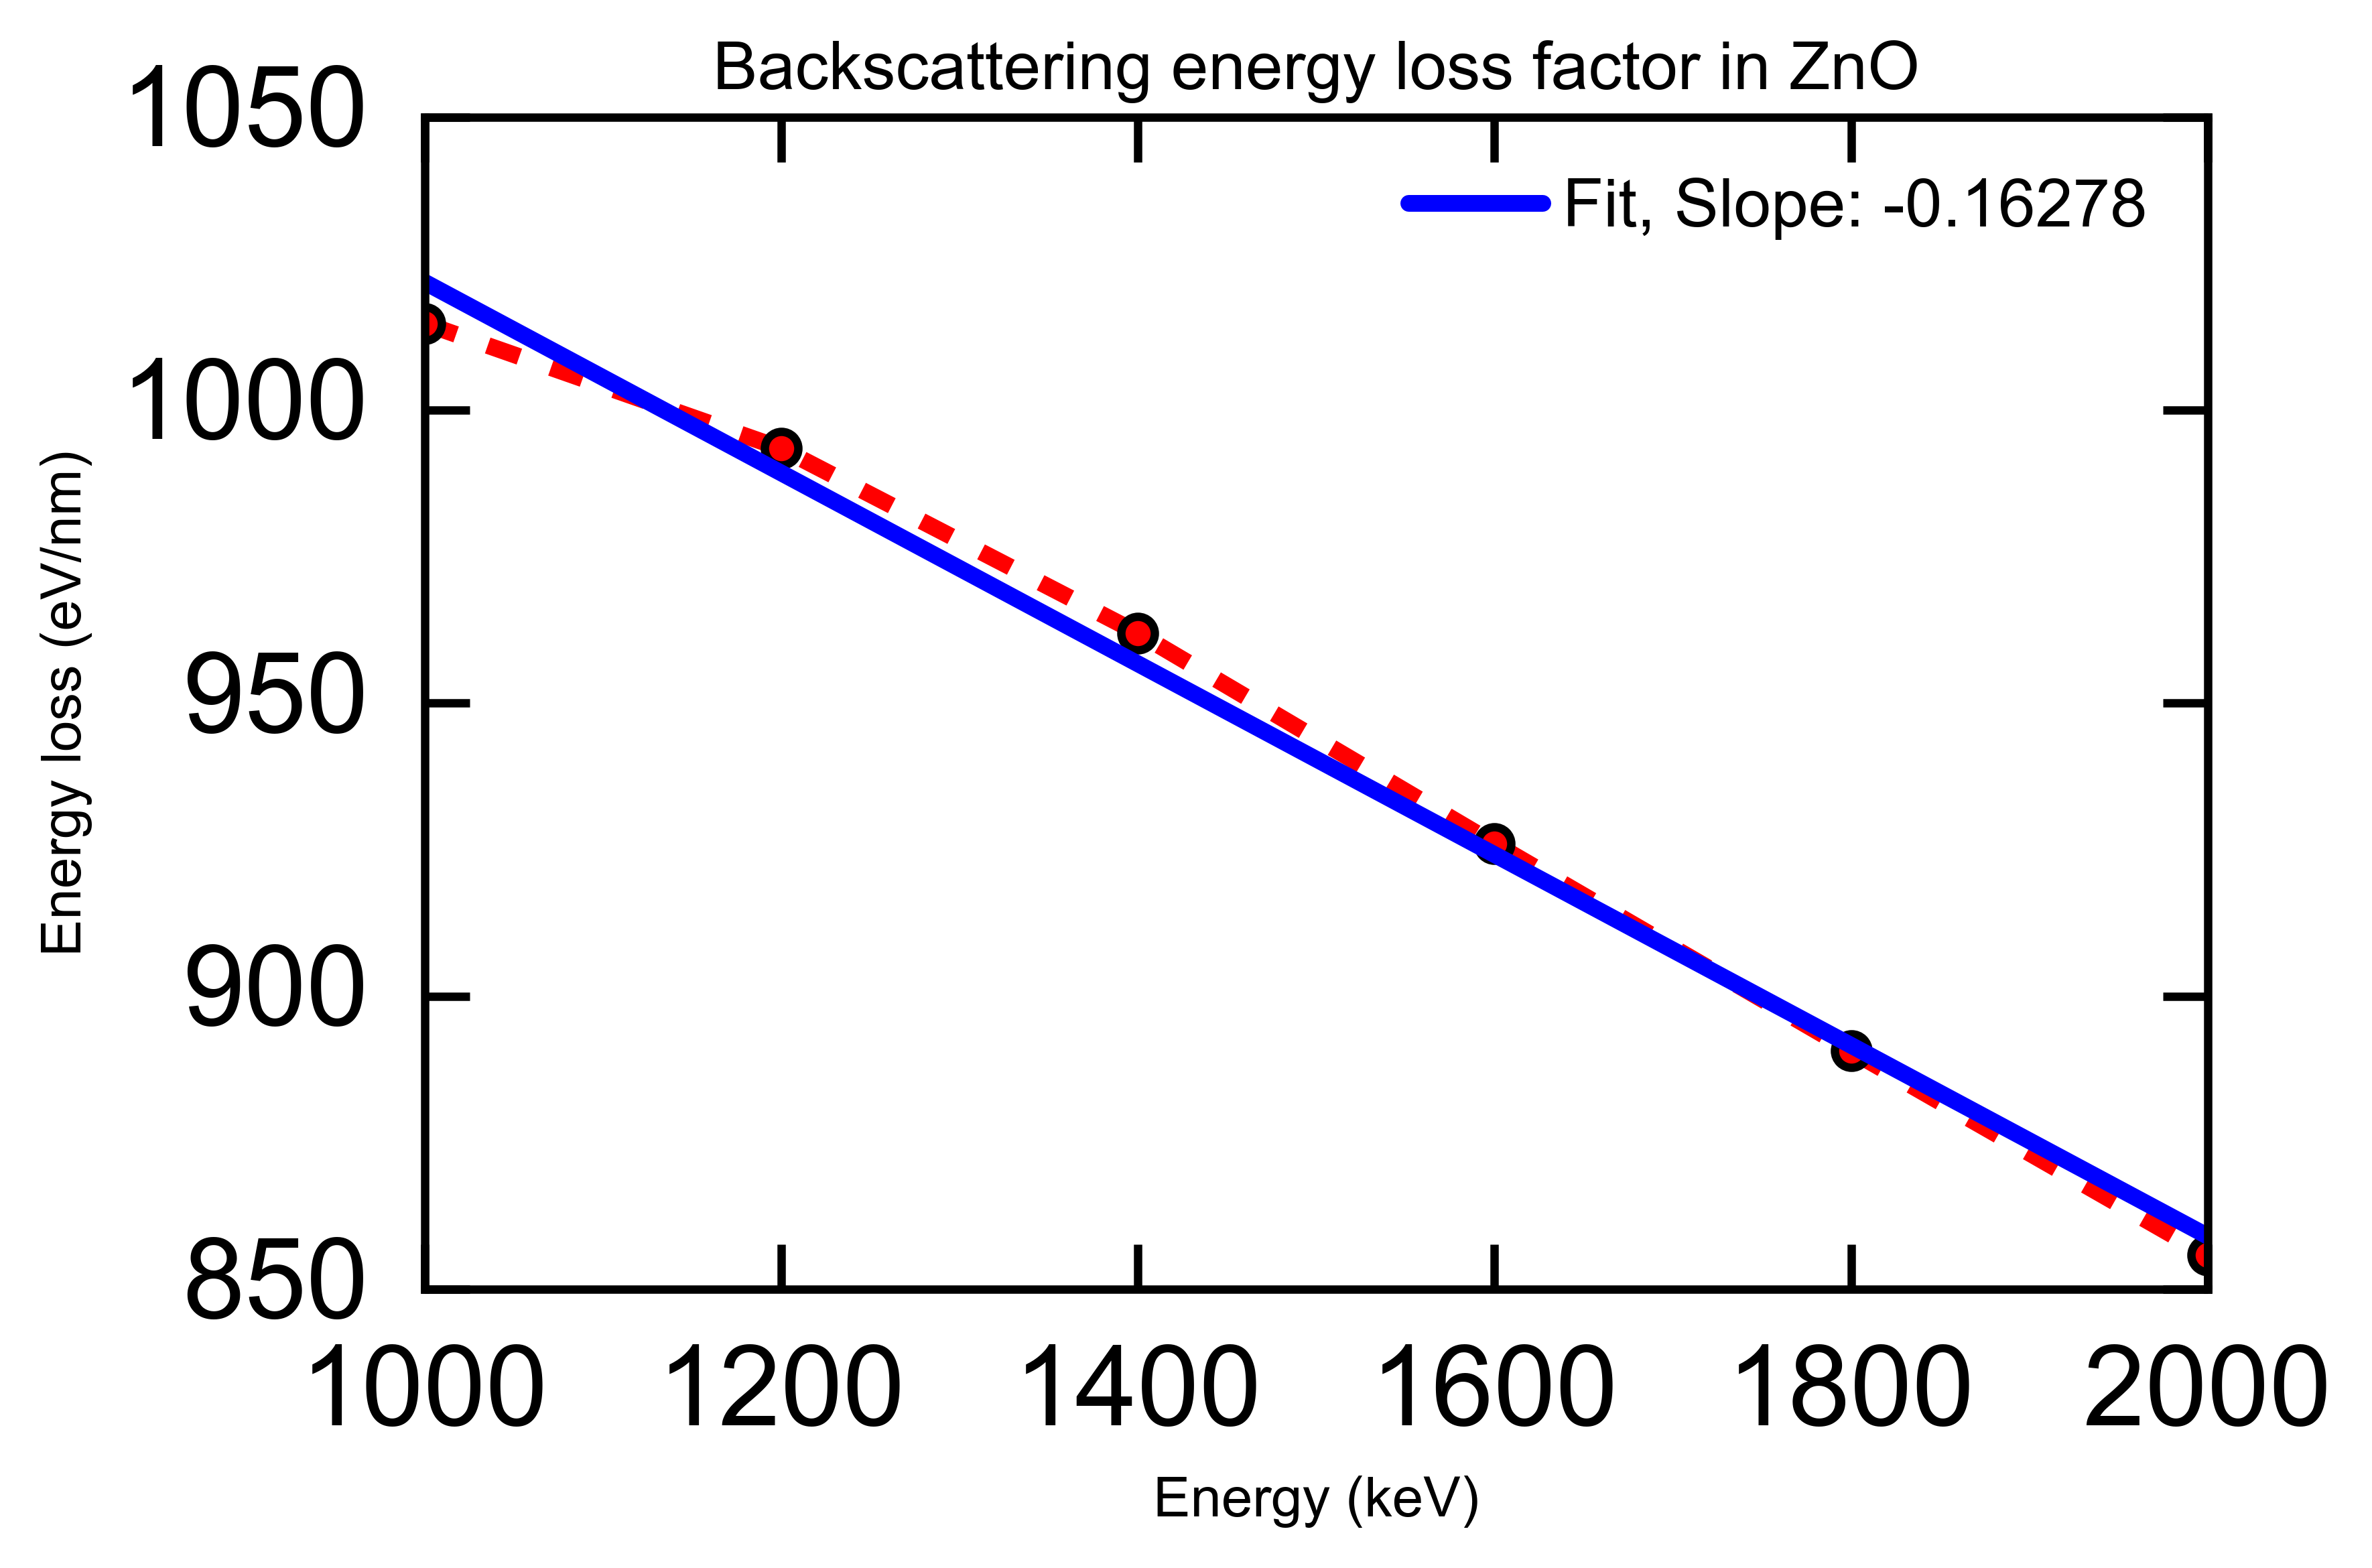

In [79]:
hw8dat = pandas.read_excel("ZnO_energy loss factor.xls", skiprows=2)
x = np.array(hw8dat.as_matrix(columns=hw8dat.columns[0:1])).squeeze()
y = np.array(hw8dat.as_matrix(columns=hw8dat.columns[1:2])).squeeze()
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)
plt.plot(x, y, 'ro--')
plt.plot(x, slope*x+intercept, 'b-', label="Fit, Slope: {}".format(slope))
plt.legend(loc="best")
plt.xlabel("Energy (keV)")
plt.ylabel("Energy loss (eV/nm)")
plt.title("Backscattering energy loss factor in ZnO")

## Problem 1, Part B
To calculate the kinematic factor, we can use the following equation:

 $$\frac{E_1}{E_2} = \left[\frac{(M_2^2-M_1^2\sin^2(\theta))^{1/2}+M_1\cos(\theta)}{M_2 + M_1}\right]^2$$ with $$M_1$$ the mass of $$^4\text{He}$$ and $$M_2$$ the mass of the material being milled.
 
 $$M_{^4\text{He}} = 4.00260 \space \text{amu}$$
 $$M_{Zn} = 65.38 \space \text{amu}$$  
 $$M_{O} = 16 \space \text{amu}$$
 $$M_{Si} = 28.0855 \space \text{amu}$$
 $$M_{Cr} = 51.9961\space \text{amu}$$

In [85]:
def e_1_over_e_2(M_1, M_2):
    theta = np.deg2rad(165)
    return (((M_2**2-((M_1**2)*np.sin(theta)**2))**(1/2)+M_1*np.cos(theta))/(M_2+M_1))**2

In [86]:
print("K = {:.4} for Zn".format(e_1_over_e_2(4.00260, 65.38 )))

K = 0.7858 for Zn


In [87]:
print("K = {:.4} for O".format(e_1_over_e_2(4.00260, 16)))

K = 0.3659 for O


## Problem 1, Part C
$$C = A+B*E_1$$
$$E_1=K*E_0$$
Now we can subsitute in 
$$C = A+B*K*E_0$$
So for Zn
$$760 = A+B *(0.7858*2\text{MeV})$$
and for O
$$340 = A+B *(0.3659*2\text{MeV})$$

So $$A = -25.99 $$ and $$B = 500 $$

## Problem 1, Part D

## Problem 2
Using the XRD data, we can calculate the lattice parameter$$d_{h,k,l}=\frac{a}{\sqrt{h^2+k^2+l^2}}$$

So, $$2.23 *\sqrt{3} = 3.86Å$$ 

Using the 